<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

[Ссылка для скачивания исходных данных](https://drive.google.com/file/d/1Kb78mAWYKcYlellTGhIjPI-bCcKbGuTn/view)

In [3]:
data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
print('Размерность таблицы:',data.shape)

Размерность таблицы: (44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
display(data.tail(3))
# data tail

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [5]:
data.info()
#isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [6]:
print('Выберите все признаки, у которых есть пропуски в данных')
cols_null_percent = data.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
print(cols_with_null)

Выберите все признаки, у которых есть пропуски в данных
Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64


5. Выведите основную статистическую информацию о столбцах.


In [7]:
display(data.describe(include=['object']))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [8]:
# Всю фразу разбиваем на отдельные слова и определяем индекс слова "образование".
# если его индекс равен 1, то значит, что нам нужно только первое слово
# во всех остальных случаях - первые два слова, приведенные к нижнему регистру
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: 
    x.lower().split()[0] if x.split().index('образование')==1 
    else ' '.join(x.lower().split()[:2]))
# Удаляем признак "Образование и ВУЗ"
data.drop('Образование и ВУЗ', axis=1, inplace=True) 

In [9]:
# Выводим информацию о соискателях со средним уровнем образования
data['Образование'].value_counts()

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [10]:
# Выделяем первое слово, и по нему присваиваем признак пола
data['Пол'] = data['Пол, возраст'].apply(lambda x: 'М' if x.split()[0] == 'Мужчина'
    else 'Ж')

# Выделяем третье слово (т.к. второе это запятая)
data['Возраст'] = data['Пол, возраст'].apply(lambda x: x.split()[2])
# и переводим его тип в "целое"
data['Возраст'] = data['Возраст'].astype('int')

# Удаляем признак "Образование и ВУЗ"
data.drop(['Пол, возраст'], axis=1, inplace=True) 

# Определеяем количество процентов женских резюме
print("Женских резюме (%):", round(data['Пол'].value_counts(normalize=True).loc['Ж'] * 100, 2))
# Определеяем средний возраст соискателей
print("Средний возраст соискателей:", round(data['Возраст'].mean(), 1))

Женских резюме (%): 19.07
Средний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [11]:
# Создадим отдельную фунцию, переводящую опыт в месяцы
def experience(exp):
    # Определяем все возможные варианты слов, следующих за числом лет
    year_words = ['лет','год','года']
    # Определяем все возможные варианты слов, следующих за числом месяцев
    month_words = ['месяц','месяца','месяцев']
    # Создаем переменные количества лет и месяцев
    years = 0
    months = 0
    # Выявляем пропуски со значением "Не указано"
    if exp is np.NaN or exp == 'Не указано':
        # и присваиваем им значение NaN
        return np.NaN
    else:
        # Так как фразы с кол-вом лет и месяцев могут встретиться несколько раз,
        # пользуемся тем, что нужная нам часть отделена двойным пробелом, и выделяем ее
        exp = exp.split('  ')[0]
        # Получившуюся фразу разделяем на слова
        exp = exp.split()
        # Выделяем все возможные варианты слова "год"
        for word in exp:
            if word in year_words:
                # и присваиваем переменной количества лет значение перед ним,
                # переведя в целое
                years = int(exp[exp.index(word)-1])
        # То же самое с месяцами        
        for word in exp:
            if word in month_words:
                months = int(exp[exp.index(word)-1])
        # Имея количество лет и месяцев, вычисляем общее кол-во месяцев        
        return years*12 + months

# Применяем нашу функцию
data['Опыт работы (месяц)'] =data['Опыт работы'].apply(experience)
# Определяем медианный опыт работы в месяцах
print("Медианный опыт работы (в месяцах):", data['Опыт работы (месяц)'].median())
# Удаляем признак "Опыт работы"
data.drop(['Опыт работы'], axis=1, inplace=True)

Медианный опыт работы (в месяцах): 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:

# Создаем отдельную функцию для выделния признака города
def get_city(arg):
    # разделяем фразу на отдельные слова
    city = arg.split()[0]
    # Список с городами-миллионниками
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
    'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
    'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    # Сначала определяем те города, названия которых неизменны
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    # Затем города-миллионники    
    elif city in million_cities:
        return 'город-миллионник'
    # А затем все остальные    
    else:
        return 'другие'

# Применяем функцию
data['Город'] = data['Город, переезд, командировки'].apply(get_city)

# Сначала разбиваем всю фразу по запятым, вторую из получившихся проверяем 
# на сокращение "метро" (м.), если оно есть, то берем третью фразу
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(lambda x: 
    x.split(',')[2] if x.split(',')[1].split()[0] == 'м.' else x.split(',')[1])
# Получившуюся фразу проверяем на наличие частицы "не" и присваиваем обратное булево значение   
data['Готовность к переезду'] = data['Готовность к переезду'].apply(lambda x: 
    not(x.split()[0]) == 'не')

# Создаем отдельную функцию определния готовности к командировкам
def ready_for_trip(arg):
    # Так же разделяем всю фразу по запятым
    for status in arg.split(','):
        # Проверяем все фразы на наличие "готов" или "готова" 
        # и отсутствие слова "переезду"
        if ('готов' in status or 'готова' in status) and 'переезду' not in status:
            # Проверяем на наличие частицы "не", присваиваем обратное значение
            return not('не' in status)

data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(
    ready_for_trip)

# Определеям процент соискателей из Питера, округляем до целого
print('процент соискателей из Санкт-Петербурга:', round(data['Город'].value_counts(normalize=True).loc['Санкт-Петербург']*100))

# Создаем отельные маски готовности к командировкам и к переезду
mask_trip = data['Готовность к командировкам']
mask_move = data['Готовность к переезду']
# Применяем фильтрацию по маскам, берем округленную долю от общего кол-ва в процентах
print('процент соискателей, готовых к переезду и командировкам:', round(data[mask_trip & mask_move].shape[0] / data.shape[0] * 100))

# Удаляем ненужные признаки
data.drop(['Город, переезд, командировки'], axis=1, inplace=True)

процент соискателей из Санкт-Петербурга: 11
процент соискателей, готовых к переезду и командировкам: 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [13]:
# Создаем отдельную функцию для создания и заполнения новых признаков
def Employments(d_frame, column):
    # Даный цикл работает по всем строкам таблицы
    for i in range(d_frame.shape[0]):
        # Данный цикл работает в каждой строке индекса i 
        # по фразам столбца, полученным от разделения по запятой
        for word in d_frame[column].iloc[i].split(','):
            # отсекаем пробелы в начале, если есть
            if word[0] == ' ':
                word = word[1:]
            # Проверяем наличие фразы среди имеющихся признаков
            # если ее нет - создаем новый признак, значения которого
            # по умолчанию будут False
            if word not in d_frame.columns:
                d_frame[word] = False
            # Далее присваиваем ячейке соответсвующего признака значение True
            d_frame.iloc[i, d_frame.columns.get_loc(word)] = True

# Применяем функцию
Employments(data, 'Занятость')
Employments(data, 'График')

# Создаем отельные маски
mask_project = data['проектная работа']
mask_vol = data['волонтерство']
# Применяем фильтрацию по маскам, берем количество
print('Количество людей, которые ищут проектную работу и волонтёрство:', data[mask_project & mask_vol].shape[0])

# Создаем отельные маски
mask_shift = data['вахтовый метод']
mask_flex = data['гибкий график']
# Применяем фильтрацию по маскам, берем количество
print('Количество людей, которые хотят работать вахтовым методом и с гибким графиком:', data[mask_shift & mask_flex].shape[0])

# Удаляем ненужные признаки
data.drop(['Занятость', 'График'], axis=1, inplace=True)

Количество людей, которые ищут проектную работу и волонтёрство: 436
Количество людей, которые хотят работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [14]:
# Таблица котировок валют
exchange_rates = pd.read_csv('ExchangeRates.csv')

# Создаем новый столбец формата datetime в главой таблице
data['date'] = pd.to_datetime(data['Обновление резюме'],
    dayfirst=True)
# и выделяем из него дату
data['date'] = data['date'].dt.date

# Создаем новый столбец формата datetime в таблице котировок
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], dayfirst=True)
# и выделяем из него дату
exchange_rates['date'] = exchange_rates['date'].dt.date

# Выделяем только числовое значение зарплаты (первое слово)
data['ЗП_сумма'] = data['ЗП'].apply(lambda x: int(x.split()[0]))

# Создаем функцию перевода типа валюты (последнее слово) в международный код
def cur_ISO(salary):
    cur = salary.split()[-1]
    if cur == 'грн.':
        return 'UAH'
    elif cur == 'бел.руб.':
        return 'BYN'
    elif cur == 'сум':
        return 'UZS'
    else:
        return cur

# Создаем отдельный признак валюты, применяя функцию
data['currency'] = data['ЗП'].apply(cur_ISO)

# Объединяем таблицы по датам и валютам
data= data.merge(
    exchange_rates,
    on=['date','currency'],
    how='left'
)

# Значения NaN, оставшиеся у рублей, заменяем на единицы
data['close'] = data['close'].fillna(1)
data['proportion'] = data['proportion'].fillna(1)

# Создаем новый признак зарплаты в рублях по формуле
data['ЗП (руб)'] = data['ЗП_сумма'] * data['close'] / data['proportion']

# Находим медианную зарплату в округленных тысячах рублей
print('Желаемая медианная заработная плата соискателей в тыс. рублей:', round(data['ЗП (руб)'].median() / 1000))

# Удаляем ненужные признаки
# Удаляем так же стоблец "Обновление резюме"
data.drop(['Обновление резюме', 'ЗП_сумма', 'currency', 'per', 'time', 'close', 'vol', 
    'proportion'], axis=1, inplace=True)

Желаемая медианная заработная плата соискателей в тыс. рублей: 59


In [15]:
data.to_csv('hh_database.csv', index=False)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [16]:
fig = px.histogram(
    data,
    x='Возраст',
    title='Распределение возраста соискателей',
    marginal='box',
    width=647,
    height=400                  
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.layout.bargap = 0.05
fig.write_image('age.png')

![](images/age.png)

Мода распределения - 30 лет, возраст соискателей варьируется от 14 до 100 лет, большинство сосискателей находятся в возрасте 23-36 лет (оценка по половине высоты распределения). Распределение похоже на логнормальное. Возраст 100 лет вероятнее всего является выбросом (нежелание указывать возраст или шутка). В остальном небольшое количество соискателей в диапазоне 60-80 лет и 14-17 лет может быть отнесено к фактическим данным: с 2017 года федеральным законом разрешена легкая работа для подростков с 14 лет, а плавный спад количества пожилых соискателей хорошо соответствует общей форме распределения. Тем не менее, просмотр данных для возраста 14-17 лет показывает, что в данном случае возраст 14 лет является выбросом.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [17]:
fig = px.histogram(
    data_frame=data,
    x='Опыт работы (месяц)',
    title='Распределение опыта работы',
    nbins=150,
    marginal='box',
    width=647,
    height=400   
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.update_traces(marker={'color': '#AB63FA'})
fig.layout.bargap = 0.05
fig.write_image('experience.png')

![](images/experience.png)

Мода распределения приходится на 80-90 месяцев, т.е. около 7 лет опыта работы. Значения варьируются от 0 до 1188 месяцев. Большинство соискателей имеет опыт работы от 1 года до 13 лет (оценка по половине высоты распределения). Распределение похоже на логнормальное, но заметен небольшой вторичный пик в области 10-12.5 лет (120-150 месяцев). Значение 1188 месяцев (ровно 99 лет) является очевидным выбросом. Второе по величине значение 663 месяца (55 лет) уже можно принять за фактическое в соответствии с обозначенным выше подходом к распределению возраста соискателей.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [18]:
fig = px.histogram(
    data_frame=data,
     x='ЗП (руб)',
    title='Распределение заработной платы',
    nbins=1500,
    marginal='box',
    width=647,
    height=400                  
)
fig.layout.yaxis.title.text = 'Количество человек'
fig.update_traces(marker={'color': '#00CC96'})
fig.layout.bargap = 0.05
fig.write_image('salary.png')

![](images/salary.png)

Желаемая заработная плата колеблется от 1 р. до 24.3 млн руб., мода распределения находится в диапазоне 40-60 т.р., большинство соискателей просят зарплату от 20 до 80 т.р. (оценка по половине высоты распределения). Распределение похоже на логнормальное. Расределение можно считать плавно спадающим к значению 1 млн руб. Присутствует пять аномально больших значений заработной платы выше 1 млн руб., которые следует считать выбросами: во-первых, они сильно отстоят от остальных точек рапсределения, во-вторых, хотя зарплаты выше 1 млн существуют в природе, вряд ли на такие позиции нанимают через сайты поиска вакансий. Также аномальными стоит считать зарплаты ниже 1 т.р., эти цифры кажутся нереально низкими даже для подростковой частичной занятости.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [19]:
mask = data['ЗП (руб)'] < 1_000_000 # фильтруем выбросы
plot_df = data[mask].groupby('Образование', as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    plot_df,
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    category_orders={'Образование': ['высшее', 'неоконченное высшее', 
                                     'среднее специальное', 'среднее']},
    title='Зависимость медианной заработной платы от образования',
    width=647,
    height=400 
)
fig.layout.xaxis.showticklabels = False
fig.write_image('salary_education.png')

![](images/salary_education.png)

Желаемая заработная плата в целом коррелирует с уровнем образования, соискатели с высшим образованием в среднем требуют наиболее более высокую зарплату. При этом требования соискателей со средним и средним специальным образованием не отличаются, эти две группы требуют наименьшую зарплату. Средние величины зарплат требуют соискатели с неоконченным высшим образованием. Поскольку наблюдается явная зависимость величины заработной платы от наличия высшего образования, признак уровня образования необходимо использовать в прогнозе.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [20]:
mask = data['ЗП (руб)'] < 1_000_000 # фильтруем выбросы

fig = px.box(
    data[mask], 
    x='ЗП (руб)',
    color='Город',
    color_discrete_sequence=px.colors.qualitative.D3,
    category_orders={'Город': ['другие', 
        'город миллионник', 'Санкт-Петербург', 'Москва']},
    title='Заработная плата по городам',
    width=647,
    height=400
)
fig.layout.legend.traceorder = 'reversed'
fig.write_image('salary_city.png')

![](images/salary_city.png)

Медианный уровень желаемой заработной платы и размах границ распределения (1.5 IQR) больше всего в Москве (медианная зарплата 85 т.р., верхняя граница 285 т.р.), затем идет Санкт-Петербург (60 т.р. и 145 т.р. соответственно). Интересно, что города-миллионники и менее населенные города практически не отличаются по статистическим показателям ожидаемой зарплаты: медиана 40 т.р., верхняя граница 105 т.р. Очевидно, что в модели необходимо учитывать признак города, при этом города-миллионники и прочие города (кроме Москвы и Санкт-Петербурга) можно объединить в одну группу, т.к. распределения мало отличаются.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [21]:
plot_df = data.groupby(  # группируем по двум признакам
    ['Готовность к переезду', 'Готовность к командировкам'], 
    as_index=False)['ЗП (руб)'].median() 
plot_df.replace({True: 'да', False: 'нет'}, inplace=True)

fig = px.bar(
    plot_df, 
    x='Готовность к переезду', # берем за "основной" признак
    y='ЗП (руб)',
    color='Готовность к командировкам', # второй признак выделяем цветом
    color_discrete_sequence=['#FFA15A', '#19D3F3'],       
    category_orders={'Готовность к переезду': ['да', 'нет'],
                     'Готовность к командировкам': ['да', 'нет']},
    barmode='group',
    title='Зависимость заработной платы от готовности к переезду и командировкам',
    width=700,
    height=400
)
fig.layout.legend.title = 'Готовность к командировкам'
fig.layout.bargroupgap = 0.05
fig.write_image('salary_trip.png')

![](images/salary_trip.png)

Готовность к командировкам существенно повышает ожидаемую заработную плату (до 50% у соискателей, не готовых к переезду). Также ожидаемая заработная плата выше при готовности к переезду, но в меньшей степени - на 10-25%. Соискатели, готовые к переезду и командировкам, закономерно требуют максимальные зарплаты.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [22]:
pivot_age_edu = data.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)
fig = px.imshow(
    pivot_age_edu,
    origin='lower',
    title='Тепловая карта заработной платы',
    width=800,
    height=500
)
fig.update_layout(template='plotly_white')
fig.write_image('salary_heatmap.png')

![](images/salary_heatmap.png)

Хорошо заметны более высокие зарплаты у категорий с высшим и неоконченным высшим образованием, при этом для соискателей с высшим образованием виден наиболее быстрый рост зарплаты в период 20-30 лет. Соискатели с высшим образованием склонны оставаться активными дольше остальных категорий - встречаются соискатели возрастом более 65 лет. У категории со средним образованием довольно слабая динамика роста зарплат с возрастом. Удивительно, но категория среднего специального образования выглядит более "холодной" по сравнению со средним образованием, причем соискатели со средним специальным образованием требуют заметно меньшие зарплаты до возраста 25 лет. Есть признаки выбросов - высшее и неоконченное высшее образование в возрасте 16-17 лет с высокой зарплатой, резко выделяющаяся по размеру зарплаты точка у категории среднего специального образования с возрастом 67 лет и среднее специальное в возрасте 15 лет с зарплатой 2000 р.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [23]:
plot_df = data[['Опыт работы (месяц)', 'Возраст']]
plot_df = plot_df.copy()
plot_df['Опыт работы'] = plot_df['Опыт работы (месяц)'] / 12
 
fig = px.scatter(
    plot_df,
    y='Опыт работы',
    x='Возраст',
    title='Опыт работы в зависимости от возраста',
    height=500 
)
fig.add_shape(type="line", x0=0, y0=0, x1=100, y1=100)
fig.write_image('age_experience.png')

![](images/age_experience.png)

Соискатели декларируют разный опыт работы от 0 до возможного максимума (начало трудового стажа с 15-16 лет), который можно оценить по "зазору" между распределением и прямой линией, обозначающей одинаковые возраст и стаж работы. Вероятно, основная масса соискателей меняла специальности в течение трудового стажа и указывает опыт, относящийся к желаемой позиции. Видны очевидные выбросы -точки выше прямой и несколько точек, близких к прямой (их в общей сложности 7), где трудовая деятельность должна была начинаться с 5-летнего возраста.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [24]:
# "Распределение по городам, круговая диаграмма"
cities = data['Город'].value_counts().sort_index()

fig = px.pie(
    names=cities.index,
    values=cities,
    title='Распределение по городам',
    color_discrete_sequence=['#D62728', '#2CA02C', '#FF7F0E', '#1F77B4'],
    hole=0.05,
    width=500,
    height=400,
)
fig.update_traces(sort=False) 
fig.write_image('cities.png')

![](images/cities.png)

Распределение количества соискателей по городам не соответствует пропорциям численности населения: население Санкт-Петербурга должно составлять около 40% населения Москвы (здесь 30%), а суммарное население городов-миллионников должно быть больше населения Москвы (здесь менее половины). Вероятно, эти диспропорции не будут сказываться на результатах моделирования, так как размер заработной платы зависит от категории города, а не от пропорций численности населения, тем не менее возникновение диспропорций вызывает вопрос о репрезентативности выборки. Возможно, что диспропорции обусловлены различной степенью популярности поиска работы через интернет-сайты.

In [25]:
# Зависимость заработной платы от опыта работы, диаграмма рассеяния,
# считаем медианную зарплату в зависимости от лет опыта и уровня образования

mask = data['Опыт работы (месяц)'] < 1188 # фильтруем выброс
plot_df = data[mask][['Опыт работы (месяц)', 'Образование', 'ЗП (руб)']]
plot_df['Опыт работы (год)'] = (plot_df['Опыт работы (месяц)'] / 12).round() # опыт в годах
plot_df = plot_df.groupby(
    ['Опыт работы (год)', 'Образование'], as_index=False)['ЗП (руб)'].median()

fig = px.scatter(
    plot_df,
    y='ЗП (руб)',
    x='Опыт работы (год)',
    facet_col='Образование',
    category_orders={'Образование': ['среднее', 'среднее специальное', 
                                     'неоконченное высшее', 'высшее']},
    title='Зависимость медианной заработной платы от опыта работы',
    height=400 
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split('=')[-1]))
fig.update_traces(marker={'color': '#AB63FA'})
fig.write_image('salary_experience.png')

![](images/salary_experience.png)

Наблюдаем различные величины и динамику роста желаемой заработной платы в зависимости от стажа и образования. По достижении определенного стажа у всех категорий прекращается рост заработной платы и появляется большое рассеяние величин. У категории среднего образования рост медианной зарплаты от 22.5 до 40 т.р. наблюдается только в течение первых двух лет стажа, причем статистическая значимость не очевидна, т.к. мало точек, после 10-летнего стажа "средняя медианная" зарплата выходит на 50 т.р. Среднее специальное образование показывает четкий рост от 25 до 50 т.р. в течение первых 10 лет. У неоконченного высшего и высшего образования рост поисходит в течение 15 лет от 30 до 80 т.р. и от 30 до 90 т.р. соответственно. Также у этих категорий образования на фоне большого рассеяния точек заметна тенденция к снижению заработной платы после достижения 20-летнего стажа.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [26]:
print('Число дубликатов:', data[data.duplicated()].shape[0])
data = data.drop_duplicates()

Число дубликатов: 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [27]:
display(data.isnull().sum())


ЗП                                   0
Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам          71
частичная занятость                  0
проектная работа                     0
полная занятость                     0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
вахтовый метод                       0
удаленная работа                     0
date                                 0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [28]:
data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(data['Опыт работы (месяц)'].median())
print(round(data['Опыт работы (месяц)'].mean()))

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [29]:
mask_low_salary = data['ЗП (руб)'] < 1e3
mask_big_salary = data['ЗП (руб)'] > 1e6

print(data[mask_low_salary | mask_big_salary].shape[0])

data.drop(
    data[mask_low_salary | mask_big_salary].index,
    inplace = True
)

89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [30]:
mask_false_exp= data[data['Опыт работы (месяц)']/12 >= data['Возраст']]
data = data.drop(mask_false_exp.index)
print(mask_false_exp.shape[0])

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

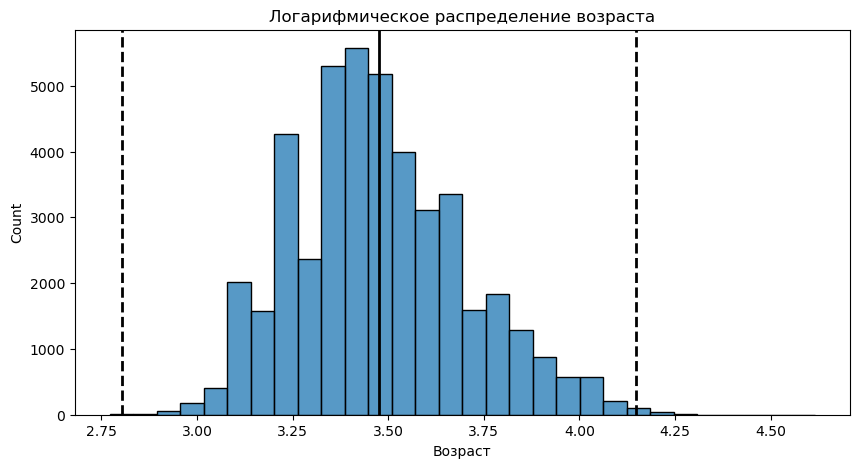

In [31]:
# Сначала построим гистограмму распределения возраста в логарифмическом масштабе
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
hh_log_age = np.log(data['Возраст'] + 1)
histplot = sns.histplot(hh_log_age, bins=30, ax=ax)
histplot.axvline(hh_log_age.mean(), color='k', lw=2)
histplot.axvline(hh_log_age.mean()+ 3 * hh_log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(hh_log_age.mean()- 3 * hh_log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Логарифмическое распределение возраста');

plt.savefig('log_age.png')

![](images/log_age.png)

Графический интервал метода трёх сигм показывает, что что количество наблюдений, не входящие в интервал, достаточно невелико. Мы удалили выбросы в возрасте соискателя (7 шт.) видно, что интервал сузился и среднее значение стало ближе к медианному. Правосторонняя ассиметрия сохранилась, почти не изменилась. Из-за небольшого количества выбросов график изменился незначительно. Из этого делаем вывод: надо внимательней приглядеться к опыту работы и возрасту. Были удалён только опыт со значением, превышающим возраст, но этого всё ещё недостаточно. 

In [32]:
 # Создаем функцию поиска выбросов методом z-отклонения
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(data, 'Возраст', log_scale=True, left=3, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')

Число выбросов по методу z-отклонения: 3
